In [25]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import cv2
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import StepLR

In [26]:
train_transform = [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
valid_transform = [transforms.RandomCrop(28, padding=4),transforms.RandomHorizontalFlip(),
                  transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]

train_transform=transforms.Compose(train_transform)
valid_transform=transforms.Compose(valid_transform)

num_workers = 0
batch_size = 40
train_data = datasets.MNIST(root='data', train= True, download=True, transform=valid_transform)
valid_data = datasets.MNIST(root='data', train= True, download=True, transform=train_transform)
test_data = datasets.MNIST(root='data', train= False, download=True, transform=train_transform)

In [27]:
num_train = len(train_data)
data_idx = list(range(num_train))
split_idx = int(num_train * 0.05)
train_idx, valid_idx = data_idx[split_idx:], data_idx[:split_idx]

In [28]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [29]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size= batch_size,
                                           sampler = train_sampler,
                                           num_workers= num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size= batch_size,
                                           sampler = valid_sampler,
                                           num_workers= num_workers)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size = batch_size, 
                                          num_workers = num_workers)

In [30]:
dataiter = iter(train_loader)
img, lbl = dataiter.next()
img.shape

torch.Size([40, 1, 28, 28])

In [31]:
dataiter = iter(train_loader)

Displaying the validation data of a single batch


<ipython-input-36-42d5459732bf>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 40/2, idx+1, xticks= [], yticks= [])


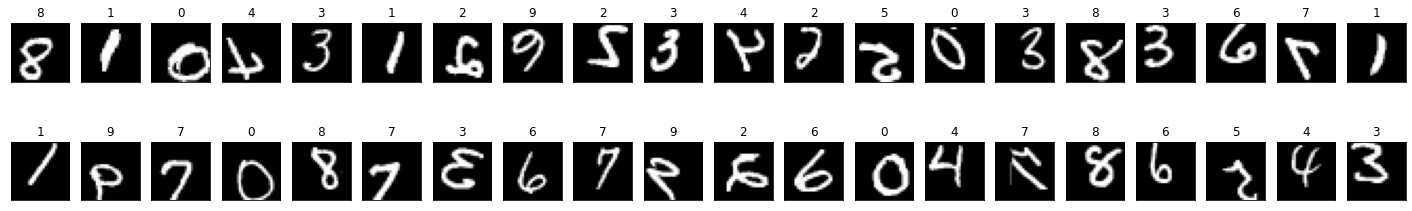

In [36]:
print('Displaying the validation data of a single batch')

images , labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize= (25,4))
for idx in np.arange(40):
    ax = fig.add_subplot(2, 40/2, idx+1, xticks= [], yticks= [])
    ax.imshow(np.squeeze(images[idx]),cmap = 'gray')
    ax.set_title(str(labels[idx].item()))
    

In [69]:
# def get_labels():
#     return dataiter.next()
a = {}
for img,lbl in dataiter:
    for i in lbl:
        if i == 0:
            a[0] = img[i]
        elif i == 1:
            a[1] = img[i]
        elif i == 2:
            a[2] = img[i]
        elif i == 3:
            a[3] = img[i]
        elif i == 4:
            a[4] = img[i]
        elif i == 5:
            a[5] = img[i]
        elif i == 6:
            a[6] = img[i]
        elif i == 7:
            a[7] = img[i]
        elif i == 8:
            a[8] = img[i]
        elif i == 9:
            a[9] = img[i]
        if len(a) == 10:
            break;       
    break;

Displaying the validation data of a single batch


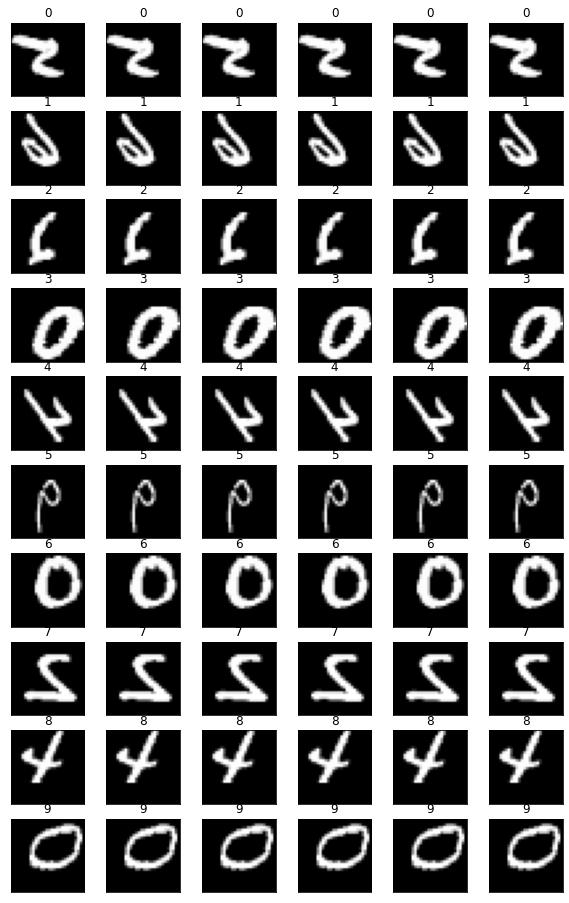

In [72]:
print('Displaying the validation data of a single batch')
images , labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize= (10,16))
count=1 
for digit in range(10):
    plot_complete = False
    for num_digit in range(6):
        ax = fig.add_subplot(10, 6, count, xticks= [], yticks= [])
        ax.imshow(np.squeeze(a[digit]),cmap = 'gray')
        ax.set_title(str(digit))
        count+=1

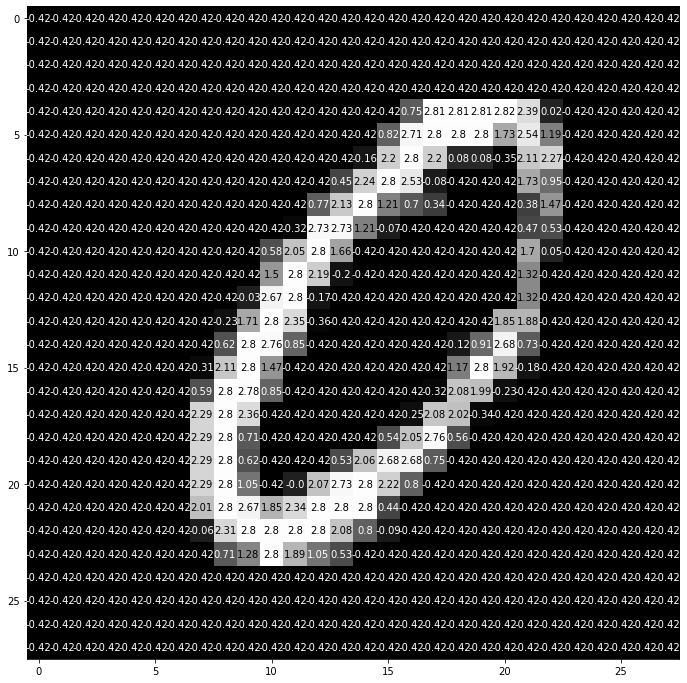

In [9]:
img = np.squeeze(images[2])
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width , height = img.shape
thresh = img.max()/ 2.5
for x in range(width):
    for y in range (height):
        val = round(img[x][y],2 ) if img[x][y] != 0 else 0
        ax.annotate(str(val),xy = (y,x),
                    horizontalalignment= 'center',
                    verticalalignment = 'center',
                    color = 'white' if img[x][y] < thresh else 'black'
                   )

In [10]:
# Declaring a neural network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = F.relu(self.fc1(x.view(batch_size,28*28)))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        return x
model = Net()
model.parameters

<bound method Module.parameters of Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [12]:
def validate_training():
    model.eval()
    valid_loss = 0.0    
    for data, target in valid_loader:
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item() * data.size(0)
    valid_loss = valid_loss / (len(valid_loader) * batch_size)
    print("Epoch {} : Validation loss : {:.6f}".format(epoch+1, valid_loss))
    return valid_loss

In [14]:
per_epoch_loss = []
validation_error = []
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss = train_loss / len(train_loader.dataset)
    print("Epoch {} : Training loss : {:.6f}".format(epoch+1, train_loss))
    per_epoch_loss.append(train_loss)
    validation_error.append(validate_training())

Epoch 1 : Training loss : 1.435882
Epoch 1 : Validation loss : 0.950661
Epoch 2 : Training loss : 0.775917
Epoch 2 : Validation loss : 0.562754
Epoch 3 : Training loss : 0.491000
Epoch 3 : Validation loss : 0.429778
Epoch 4 : Training loss : 0.411518
Epoch 4 : Validation loss : 0.378166
Epoch 5 : Training loss : 0.373960
Epoch 5 : Validation loss : 0.349094
Epoch 6 : Training loss : 0.348017
Epoch 6 : Validation loss : 0.327299
Epoch 7 : Training loss : 0.329856
Epoch 7 : Validation loss : 0.311207
Epoch 8 : Training loss : 0.313871
Epoch 8 : Validation loss : 0.297579
Epoch 9 : Training loss : 0.302076
Epoch 9 : Validation loss : 0.287773
Epoch 10 : Training loss : 0.291022
Epoch 10 : Validation loss : 0.277454
Epoch 11 : Training loss : 0.281390
Epoch 11 : Validation loss : 0.268747
Epoch 12 : Training loss : 0.270813
Epoch 12 : Validation loss : 0.261041
Epoch 13 : Training loss : 0.264240
Epoch 13 : Validation loss : 0.253537
Epoch 14 : Training loss : 0.256576
Epoch 14 : Validatio

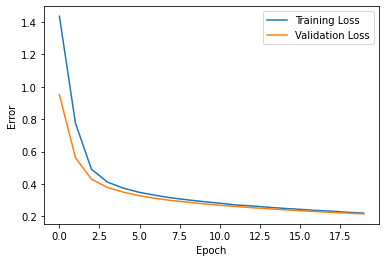

In [15]:
plt.plot(np.arange(20), per_epoch_loss, label='Training Loss')
plt.plot(np.arange(20), validation_error, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [16]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output,target)
    test_loss += loss.item()*data.size(0)
    _, preds = torch.max(output, 1)
    correct = np.squeeze(preds.eq(target.data.view_as(preds)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print("Test loss : {:.6f}\n".format(test_loss))

Test loss : 0.212048



In [17]:
for i in range(10):
    print('Test accuracy of %5s : %2d%% (%2d / %2d )' % ( str(i), 100. * class_correct[i] / class_total[i], 
          np.sum(class_correct[i]), np.sum(class_total[i])))
print("Total accuracy : %2d%% (%2d / %2d)" % (100. *np.sum(class_correct) / np.sum(class_total) , 
                                              np.sum(class_correct), np.sum(class_total)))

Test accuracy of     0 : 98% (963 / 980 )
Test accuracy of     1 : 97% (1111 / 1135 )
Test accuracy of     2 : 92% (953 / 1032 )
Test accuracy of     3 : 93% (941 / 1010 )
Test accuracy of     4 : 94% (931 / 982 )
Test accuracy of     5 : 90% (805 / 892 )
Test accuracy of     6 : 95% (912 / 958 )
Test accuracy of     7 : 92% (955 / 1028 )
Test accuracy of     8 : 91% (894 / 974 )
Test accuracy of     9 : 92% (931 / 1009 )
Total accuracy : 93% (9396 / 10000)


In [ ]:
dataiter = iter(valid_loader)

In [ ]:
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), 
                 color= ("green" if preds[idx] == labels[idx] else "red"))

In [ ]:
images, labels = dataiter.next()
# model(images)
images[0].shape

In [ ]:
optimizer.state_dict()

In [ ]:
torch.save({'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            },'mnist_model_A')

In [ ]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

checkpoint = torch.load('mnist_model_A')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output,target)
    test_loss += loss.item()*data.size(0)
    _, preds = torch.max(output, 1)
    correct = np.squeeze(preds.eq(target.data.view_as(preds)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print("Test loss : {:.6f}\n".format(test_loss))

In [ ]:
ls

In [ ]:
from PIL import Image

In [ ]:
read_img = Image.open("sample.png")
read_img = read_img.convert('L')

In [ ]:
read_img

In [ ]:
read_imgpreprocess = transforms.Compose([
	   transforms.Resize(28),
	   transforms.CenterCrop(28),
	   transforms.ToTensor()
	])
preprocess = transforms.Compose([
	   transforms.Resize(28),
	   transforms.CenterCrop(28),
	   transforms.ToTensor()
	])

In [ ]:
img_tensor = preprocess(read_img)
img_tensor.reshape(-1,1).shape

In [ ]:
output = model(img_tensor.reshape(-1,1))
_, preds = torch.max(output, 1)
preds

In [ ]:
model(img_tensor.reshape(-1,1))

In [ ]:
img = np.squeeze(img_tensor.numpy())
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width , height = img.shape
thresh = img.max()/ 2.5
for x in range(width):
    for y in range (height):
        val = round(img[x][y],2 ) if img[x][y] != 0 else 0
        ax.annotate(str(val),xy = (y,x),
                    horizontalalignment= 'center',
                    verticalalignment = 'center',
                    color = 'white' if img[x][y] < thresh else 'black'
                   )

In [ ]:
# A CNN based Feature extractor
# Definining neural network in python by a class which inherits from nn.Module
class LeNet(nn.Module):
    """LeNet feature extractor model."""

    def __init__(self):
        """Init LeNet feature extractor model."""
        super(LeNet, self).__init__()

        # Defining the CNNfeature Extractor
        self.feature_extractor = nn.Sequential(
            # input [1 x 28 x 28]
            # 1st conv layer
            # Conv which convolves input image with 6 filters of 5x5 size, without padding
            nn.Conv2d(1, 6, kernel_size=5),
            # [6 x 24 x` 24]
            nn.MaxPool2d(kernel_size=2), # Max pooling subsampling operation
            # [6 x 12 x 12]
            nn.ReLU(), # Non linear activation function
            # 2nd conv layer
            # input [6 x 12 x 12]
            # Conv which convolves input image with 16 filters of 5x5 size, without padding
            nn.Conv2d(6, 16, kernel_size=5),
            # [16 x 8 x 8]
            nn.MaxPool2d(kernel_size=2),
            # [16 x 4 x 4]
            nn.ReLU()
        )
        
        # Defining the Classifier
        self.classifier = nn.Sequential(
            # Linear layer with 120 nodes, taking a flattened [16 x 4 x 4] as input
            nn.Linear(16 * 4 * 4 , 120),
            # Linear layer with 84 nodes
            nn.Linear(120, 84),
            # ReLU
            nn.ReLU(),
            # Output layer with as many nodes as number of classes
            nn.Linear(84, 10)
        )
        
    def forward(self, input):
        """Define a Forward pass of the LeNet."""
        out = self.feature_extractor(input) # Pass input through the feature extractor
        out = out.view(-1, 16 * 4 * 4 ) # Reshape the 2D to a vector
        out = self.classifier(out) # pass features through the classifier to get predictions
        return out

In [ ]:
lenet = LeNet()
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# lenet = lenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.001)

In [ ]:
lenet.train()
epochs = 8
for epoch in range(epochs):
    train_loss = 0.0    
    for data, target in train_loader:
        # data = data.to(device)
        # target = target.to(device)
        optimizer.zero_grad()
        output = lenet(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    
    train_loss = train_loss / len(train_loader.dataset)
    print("Epoch {} : Training loss : {:.6f}".format(epoch+1, train_loss))

In [ ]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

lenet.eval()

for data, target in test_loader:
    # data = data.to(device)
    # target = target.to(device)
    output = lenet(data)
    loss = criterion(output,target)
    test_loss += loss.item()*data.size(0)
    _, preds = torch.max(output, 1)
    correct = np.squeeze(preds.eq(target.data.view_as(preds)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print("Test loss : {:.6f}\n".format(test_loss))

In [ ]:
img_tensor=img_tensor.to(device)
lenet.to(device)
output = lenet(img_tensor.reshape(1,1, 28, 28))
_, preds = torch.max(output, 1)
preds

In [ ]:
lenet.state_dict()

In [ ]:
torch.save({'lenet_state_dict': lenet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            },'mnist_model_B')

In [ ]:
lenet = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.001)

checkpoint = torch.load('mnist_model_B')
lenet.load_state_dict(checkpoint['lenet_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])